In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

In [2]:
# Configurando o pandas em relação a exibição de colunas
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

sns.set()

In [3]:
# Lendo os dados de treino e teste
dados = pd.read_csv('train.csv', index_col=0)
dados_teste = pd.read_csv('test.csv')

# Passando o nome das colunas para minusculo para facilitar o trabalho
dados.rename(str.lower, axis='columns', inplace=True)
dados_teste.rename(str.lower, axis='columns', inplace=True)

In [4]:
dados.head()

,nu_inscricao,nu_ano,co_municipio_residencia,no_municipio_residencia,co_uf_residencia,sg_uf_residencia,nu_idade,tp_sexo,tp_estado_civil,tp_cor_raca,tp_nacionalidade,co_municipio_nascimento,no_municipio_nascimento,co_uf_nascimento,sg_uf_nascimento,tp_st_conclusao,tp_ano_concluiu,tp_escola,tp_ensino,in_treineiro,co_escola,co_municipio_esc,no_municipio_esc,co_uf_esc,sg_uf_esc,tp_dependencia_adm_esc,tp_localizacao_esc,tp_sit_func_esc,in_baixa_visao,in_cegueira,in_surdez,in_deficiencia_auditiva,in_surdo_cegueira,in_deficiencia_fisica,in_deficiencia_mental,in_deficit_atencao,in_dislexia,in_discalculia,in_autismo,in_visao_monocular,in_outra_def,in_sabatista,in_gestante,in_lactante,in_idoso,in_estuda_classe_hospitalar,in_sem_recurso,in_braille,in_ampliada_24,in_ampliada_18,in_ledor,in_acesso,in_transcricao,in_libras,in_leitura_labial,in_mesa_cadeira_rodas,in_mesa_cadeira_separada,in_apoio_perna,in_guia_interprete,in_maca,in_computador,in_cadeira_especial,in_cadeira_canhoto,in_cadeira_acolchoada,in_prova_deitado,in_mobiliario_obeso,in_lamina_overlay,in_protetor_auricular,in_medidor_glicose,in_maquina_braile,in_soroban,in_marca_passo,in_sonda,in_medicamentos,in_sala_individual,in_sala_especial,in_sala_acompanhante,in_mobiliario_especifico,in_material_especifico,in_nome_social,in_certificado,no_entidade_certificacao,co_uf_entidade_certificacao,sg_uf_entidade_certificacao,co_municipio_prova,no_municipio_prova,co_uf_prova,sg_uf_prova,tp_presenca_cn,tp_presenca_ch,tp_presenca_lc,tp_presenca_mt,co_prova_cn,co_prova_ch,co_prova_lc,co_prova_mt,nu_nota_cn,nu_nota_ch,nu_nota_lc,nu_nota_mt,tx_respostas_cn,tx_respostas_ch,tx_respostas_lc,tx_respostas_mt,tp_lingua,tx_gabarito_cn,tx_gabarito_ch,tx_gabarito_lc,tx_gabarito_mt,tp_status_redacao,nu_nota_comp1,nu_nota_comp2,nu_nota_comp3,nu_nota_comp4,nu_nota_comp5,nu_nota_redacao,q001,q002,q003,q004,q005,q006,q007,q008,q009,q010,q011,q012,q013,q014,q015,q016,q017,q018,q019,q020,q021,q022,q023,q024,q025,q026,q027,q028,q029,q030,q031,q032,q033,q034,q035,q036,q037,q038,q039,q040,q041,q042,q043,q044,q045,q046,q047,q048,q049,q050
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0

In [5]:
dados.head()

,nu_inscricao,nu_ano,co_municipio_residencia,no_municipio_residencia,co_uf_residencia,sg_uf_residencia,nu_idade,tp_sexo,tp_estado_civil,tp_cor_raca,tp_nacionalidade,co_municipio_nascimento,no_municipio_nascimento,co_uf_nascimento,sg_uf_nascimento,tp_st_conclusao,tp_ano_concluiu,tp_escola,tp_ensino,in_treineiro,co_escola,co_municipio_esc,no_municipio_esc,co_uf_esc,sg_uf_esc,tp_dependencia_adm_esc,tp_localizacao_esc,tp_sit_func_esc,in_baixa_visao,in_cegueira,in_surdez,in_deficiencia_auditiva,in_surdo_cegueira,in_deficiencia_fisica,in_deficiencia_mental,in_deficit_atencao,in_dislexia,in_discalculia,in_autismo,in_visao_monocular,in_outra_def,in_sabatista,in_gestante,in_lactante,in_idoso,in_estuda_classe_hospitalar,in_sem_recurso,in_braille,in_ampliada_24,in_ampliada_18,in_ledor,in_acesso,in_transcricao,in_libras,in_leitura_labial,in_mesa_cadeira_rodas,in_mesa_cadeira_separada,in_apoio_perna,in_guia_interprete,in_maca,in_computador,in_cadeira_especial,in_cadeira_canhoto,in_cadeira_acolchoada,in_prova_deitado,in_mobiliario_obeso,in_lamina_overlay,in_protetor_auricular,in_medidor_glicose,in_maquina_braile,in_soroban,in_marca_passo,in_sonda,in_medicamentos,in_sala_individual,in_sala_especial,in_sala_acompanhante,in_mobiliario_especifico,in_material_especifico,in_nome_social,in_certificado,no_entidade_certificacao,co_uf_entidade_certificacao,sg_uf_entidade_certificacao,co_municipio_prova,no_municipio_prova,co_uf_prova,sg_uf_prova,tp_presenca_cn,tp_presenca_ch,tp_presenca_lc,tp_presenca_mt,co_prova_cn,co_prova_ch,co_prova_lc,co_prova_mt,nu_nota_cn,nu_nota_ch,nu_nota_lc,nu_nota_mt,tx_respostas_cn,tx_respostas_ch,tx_respostas_lc,tx_respostas_mt,tp_lingua,tx_gabarito_cn,tx_gabarito_ch,tx_gabarito_lc,tx_gabarito_mt,tp_status_redacao,nu_nota_comp1,nu_nota_comp2,nu_nota_comp3,nu_nota_comp4,nu_nota_comp5,nu_nota_redacao,q001,q002,q003,q004,q005,q006,q007,q008,q009,q010,q011,q012,q013,q014,q015,q016,q017,q018,q019,q020,q021,q022,q023,q024,q025,q026,q027,q028,q029,q030,q031,q032,q033,q034,q035,q036,q037,q038,q039,q040,q041,q042,q043,q044,q045,q046,q047,q048,q049,q050
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0

In [6]:
# Criando o dataframe de descrição
dados_info = pd.DataFrame({
    'coluna': dados.columns.values,
    'tipo': dados.dtypes.values,
    'quantidade_nulos': dados.isnull().sum().values
})

dados_info['percentual_nulos'] = dados_info['quantidade_nulos']/dados.shape[0]
dados_info

,coluna,tipo,quantidade_nulos,percentual_nulos
0,nu_inscricao,object,0,0.000000
1,nu_ano,int64,0,0.000000
2,co_municipio_residencia,int64,0,0.000000
3,no_municipio_residencia,object,0,0.000000
4,co_uf_residencia,int64,0,0.000000
5,sg_uf_residencia,object,0,0.000000
6,nu_idade,int64,0,0.000000
7,tp_sexo,object,0,0.000000
8,tp_estado_civil,float64,528,0.038456
9,tp_cor_raca,int64,0,0.000000


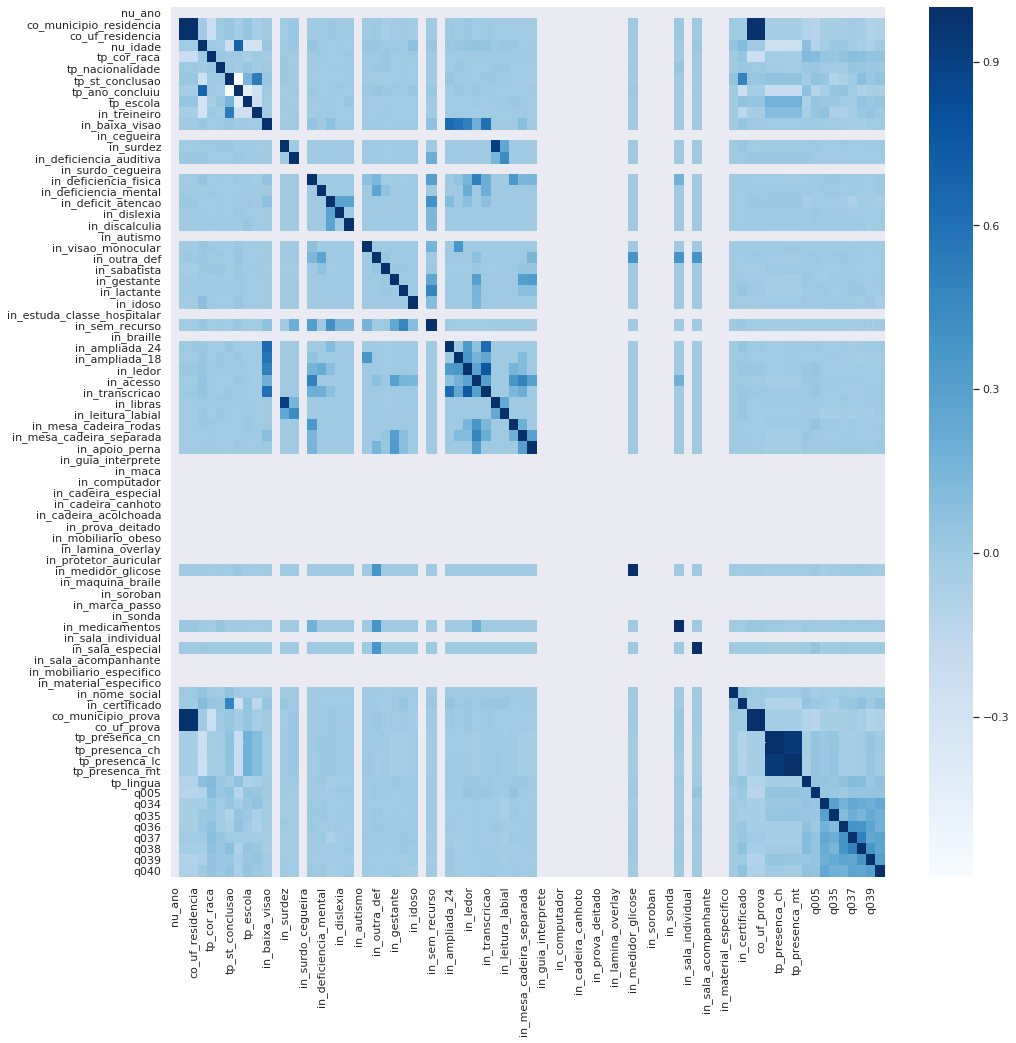

In [7]:
# Buscando por correlações nos dados onde não contém faltates
plt.figure(figsize=(16, 16))
ax = sns.heatmap(dados[dados_info[dados_info.quantidade_nulos ==0].coluna.values].corr(), cmap='Blues')
plt.show()

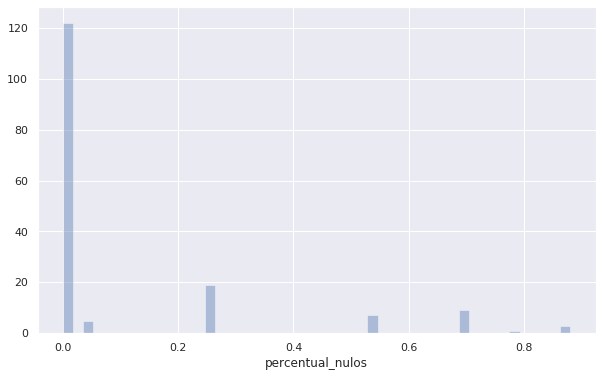

In [8]:
# Exibir o histograma de variáveis nulas com kde=False para mostrar a quantidade
plt.figure(figsize=(10, 6))
ax = sns.distplot(dados_info.percentual_nulos, kde=False)

plt.show()

In [9]:
# Verificando a quantidade faltante em as variáveis que são relativas a presença no dia da prova
dados_info[dados_info.coluna.isin(['tp_presenca_cn', 'tp_presenca_ch', 'tp_presenca_lc', 
                                   'tp_presenca_mt', 'tp_status_redacao'])]

,coluna,tipo,quantidade_nulos,percentual_nulos
88,tp_presenca_cn,int64,0,0.000000
89,tp_presenca_ch,int64,0,0.000000
90,tp_presenca_lc,int64,0,0.000000
91,tp_presenca_mt,int64,0,0.000000
109,tp_status_redacao,float64,3597,0.261981


In [10]:
# Preenchendo os dados faltantes com zero
dados.loc[dados.tp_status_redacao.isnull(), ['tp_status_redacao', 'nu_nota_redacao', 
                                             'nu_nota_comp1', 'nu_nota_comp2', 'nu_nota_comp3', 
                                             'nu_nota_comp4']] = 0

In [11]:
dados[['tp_presenca_cn', 'tp_presenca_ch', 'tp_presenca_lc', 
       'tp_presenca_mt', 'tp_status_redacao']].corr()

,tp_presenca_cn,tp_presenca_ch,tp_presenca_lc,tp_presenca_mt,tp_status_redacao
tp_presenca_cn,1.000000,1.000000,0.943361,0.943361,0.591525
tp_presenca_ch,1.000000,1.000000,0.943361,0.943361,0.591525
tp_presenca_lc,0.943361,0.943361,1.000000,1.000000,0.624955
tp_presenca_mt,0.943361,0.943361,1.000000,1.000000,0.624955
tp_status_redacao,0.591525,0.591525,0.624955,0.624955,1.000000


Existe um correlação perfeita positiva entre `tp_presenca_lc, tp_presenca_mt` devido ao fato de ser realizado mais de uma prova por dia sendo a mesma em um único caderno de resposta.

In [12]:
# Preenchendo os dados com zeros caso não esteja presente para a prova
dados.loc[dados.tp_presenca_cn != 1, 'nu_nota_cn'] = 0
dados.loc[dados.tp_presenca_ch != 1, 'nu_nota_ch'] = 0
dados.loc[dados.tp_presenca_lc != 1, 'nu_nota_lc'] = 0
dados.loc[dados.tp_presenca_mt != 1, 'nu_nota_mt'] = 0

In [13]:
# Criando um  novo recurso sendo a média das notas das outras provas
dados['nu_nota_media'] = (dados.nu_nota_cn + dados.nu_nota_ch + dados.nu_nota_lc + dados.nu_nota_redacao)/4

dados.head()

,nu_inscricao,nu_ano,co_municipio_residencia,no_municipio_residencia,co_uf_residencia,sg_uf_residencia,nu_idade,tp_sexo,tp_estado_civil,tp_cor_raca,tp_nacionalidade,co_municipio_nascimento,no_municipio_nascimento,co_uf_nascimento,sg_uf_nascimento,tp_st_conclusao,tp_ano_concluiu,tp_escola,tp_ensino,in_treineiro,co_escola,co_municipio_esc,no_municipio_esc,co_uf_esc,sg_uf_esc,tp_dependencia_adm_esc,tp_localizacao_esc,tp_sit_func_esc,in_baixa_visao,in_cegueira,in_surdez,in_deficiencia_auditiva,in_surdo_cegueira,in_deficiencia_fisica,in_deficiencia_mental,in_deficit_atencao,in_dislexia,in_discalculia,in_autismo,in_visao_monocular,in_outra_def,in_sabatista,in_gestante,in_lactante,in_idoso,in_estuda_classe_hospitalar,in_sem_recurso,in_braille,in_ampliada_24,in_ampliada_18,in_ledor,in_acesso,in_transcricao,in_libras,in_leitura_labial,in_mesa_cadeira_rodas,in_mesa_cadeira_separada,in_apoio_perna,in_guia_interprete,in_maca,in_computador,in_cadeira_especial,in_cadeira_canhoto,in_cadeira_acolchoada,in_prova_deitado,in_mobiliario_obeso,in_lamina_overlay,in_protetor_auricular,in_medidor_glicose,in_maquina_braile,in_soroban,in_marca_passo,in_sonda,in_medicamentos,in_sala_individual,in_sala_especial,in_sala_acompanhante,in_mobiliario_especifico,in_material_especifico,in_nome_social,in_certificado,no_entidade_certificacao,co_uf_entidade_certificacao,sg_uf_entidade_certificacao,co_municipio_prova,no_municipio_prova,co_uf_prova,sg_uf_prova,tp_presenca_cn,tp_presenca_ch,tp_presenca_lc,tp_presenca_mt,co_prova_cn,co_prova_ch,co_prova_lc,co_prova_mt,nu_nota_cn,nu_nota_ch,nu_nota_lc,nu_nota_mt,tx_respostas_cn,tx_respostas_ch,tx_respostas_lc,tx_respostas_mt,tp_lingua,tx_gabarito_cn,tx_gabarito_ch,tx_gabarito_lc,tx_gabarito_mt,tp_status_redacao,nu_nota_comp1,nu_nota_comp2,nu_nota_comp3,nu_nota_comp4,nu_nota_comp5,nu_nota_redacao,q001,q002,q003,q004,q005,q006,q007,q008,q009,q010,q011,q012,q013,q014,q015,q016,q017,q018,q019,q020,q021,q022,q023,q024,q025,q026,q027,q028,q029,q030,q031,q032,q033,q034,q035,q036,q037,q038,q039,q040,q041,q042,q043,q044,q045,q046,q047,q048,q049,q050,nu_nota_media
1,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,1,4314902.0,Porto Alegre,43.0,RS,1,4,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,4314902,Porto Alegre,43,RS,1,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,ABACCABDBEDEDEEDDDBBBDAABABECDCCCAAABCBEEABCA,BBEBCAEBCEDBDDEBCACDBCBDABDDCDBEDCEAEABCAADAC,99999DCABCABCBBCADBCBBABAEADBEEBEDAAABAEAECCBB...,AECCCBABDCADDBCBCCADADBBAADEBCEEBABCDDEAABCAA,1,BCADBCEDCCBADBDCADBEBDBEADCCAEACDBEDBCACAEBEE,BCBCCADCCBEDDBEEADBDCECCBBECAEEDDADCDDACAADBA,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDAABDBCEADDBECEBAEBC,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,B,B,3,C,A,B,B,B,A,B,A,A,A,A,A,A,B,A,A,C,A,A,A,C,H,E,5.0,5.0,1.0,0.0,0.0,5,5,0,5,5,5,5,5.0,A,A,A,A,A,A,A,B,D,508.225
2,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,1,2304707.0,Granja,23.0,CE,2,0,2,1.0,0,23005157.0,2304707.0,Granja,23.0,CE,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2304707,Granja,23,CE,1,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,EDAAABDABADBCCAEDCDDECABADBEECBBAEEDCABCAABBC,ADCAABAADCEDAACDACEEDACBDCBACEDEDBACAADADABDC,99999ACBACDBDBCEADDAEEADCCEACEEDBECAAAACBECDAC...,AEDACBDECEDAEEAEDDEBDECDCECACADCACACAABDACEAB,1,EBEECADBCABECDDBEADCCABDEABEBCADBADDCCCEDBBCA,DCECBAAADCBBECAEDCEDDACCBDDACEDDBADBCADBCBCEE,CEDEACCBEBDBABECABDADEADCEDCBEBBCEBAAEBAAECBBC...,DADCCECBDECADCBACDBCEEABDDA

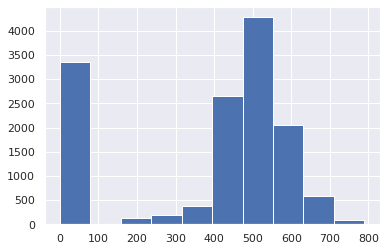

In [14]:
dados.nu_nota_media.hist()

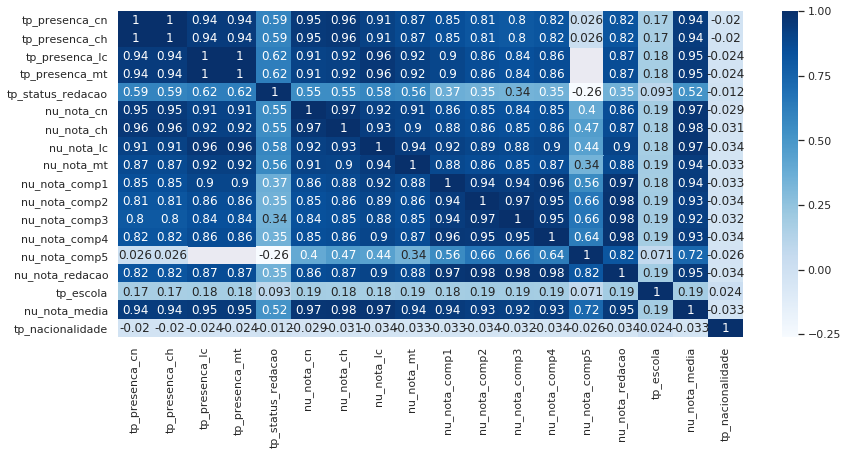

In [15]:
plt.figure(figsize=(14, 6))
ax = sns.heatmap(dados[['tp_presenca_cn', 'tp_presenca_ch', 'tp_presenca_lc',
       'tp_presenca_mt', 'tp_status_redacao','nu_nota_cn', 'nu_nota_ch', 'nu_nota_lc', 'nu_nota_mt',
       'nu_nota_comp1', 'nu_nota_comp2', 'nu_nota_comp3', 'nu_nota_comp4',
       'nu_nota_comp5', 'nu_nota_redacao', 'tp_escola', 'nu_nota_media', 'tp_nacionalidade']].corr(), annot=True, cmap='Blues')

plt.show()

In [16]:
dados.groupby(by=['tp_nacionalidade']).nu_nota_mt.mean()

tp_nacionalidade
0    344.607692
1    358.346277
2    299.677007
3    439.287500
4    376.820000
Name: nu_nota_mt, dtype: float64

In [17]:
dados[['tp_status_redacao', 'nu_nota_redacao', 'tp_presenca_ch', 'tp_presenca_lc',
       'nu_nota_comp1', 'nu_nota_comp2', 'nu_nota_comp3', 'nu_nota_comp4','nu_nota_comp5']].corr()

,tp_status_redacao,nu_nota_redacao,tp_presenca_ch,tp_presenca_lc,nu_nota_comp1,nu_nota_comp2,nu_nota_comp3,nu_nota_comp4,nu_nota_comp5
tp_status_redacao,1.000000,0.352916,0.591525,0.624955,0.365226,0.349995,0.343969,0.351634,-0.261122
nu_nota_redacao,0.352916,1.000000,0.821287,0.865595,0.968156,0.979367,0.979547,0.978794,0.816248
tp_presenca_ch,0.591525,0.821287,1.000000,0.943361,0.849426,0.814196,0.800356,0.818330,0.026419
tp_presenca_lc,0.624955,0.865595,0.943361,1.000000,0.895790,0.858430,0.843652,0.862452,NaN
nu_nota_comp1,0.365226,0.968156,0.849426,0.895790,1.000000,0.942819,0.938204,0.959026,0.558587
nu_nota_comp2,0.349995,0.979367,0.814196,0.858430,0.942819,1.000000,0.965976,0.951199,0.655915
nu_nota_comp3,0.343969,0.979547,0.800356,0.843652,0.938204,0.965976,1.000000,0.953317,0.664350
nu_nota_comp4,0.351634,0.978794,0.818330,0.862452,0.959026,0.951199,0.953317,1.000000,0.635018
nu_nota_comp5,-0.261122,0.816248,0.026419,NaN,0.558587,0.655915,0.664350,0.635018,1.000000


In [18]:
media_geral_uf = dados.groupby(by=['sg_uf_residencia']).agg({
    'nu_nota_media': 'mean'
}).sort_values('nu_nota_media', ascending=False).reset_index()

media_geral_uf

,sg_uf_residencia,nu_nota_media
0,SE,428.117077
1,ES,407.191544
2,AL,406.045595
3,SC,402.497436
4,PB,401.017405
5,TO,400.058084
6,PA,398.688931
7,MG,394.251510
8,GO,392.244671
9,PI,389.596147


In [19]:
dados['media_geral_uf'] = 0
for i, valor in media_geral_uf.iterrows():
    dados.loc[dados.sg_uf_residencia == valor.sg_uf_residencia, 'media_geral_uf'] = valor.nu_nota_media

In [20]:
variaveis_numericas = ['tp_presenca_cn', 'tp_presenca_ch', 'tp_presenca_lc',
                       'nu_nota_cn', 'nu_nota_ch', 'nu_nota_lc']

variaveis_categoricas = ['tp_nacionalidade']
variaveis = variaveis_numericas + variaveis_categoricas

## Hiperparametros

Seleção dos hiperparâmetros para um `Random Forest`

## Construindo o pipeline

Construir o pipeline para enviar a submissão.

In [21]:
pipeline_numerico = Pipeline(steps=[('seletor_num', 
                                     ColumnTransformer(transformers=[
                                         ('selecao_num', 'passthrough', variaveis_numericas)])),
                                    ('imputacao', SimpleImputer(strategy = 'most_frequent'))])

pipeline_categorico = Pipeline(steps = [('cat_selector',
                                          ColumnTransformer(transformers=[
                                              ('selecao_cat', 'passthrough', variaveis_categoricas)])),
                                         ('one_hot_encoder', OneHotEncoder(sparse = False))])


pipeline_transformador = FeatureUnion(transformer_list = [('pipeline_categorico', pipeline_categorico),
                                                          ('pipeline_numerico', pipeline_numerico)])

pipeline_modelo = Pipeline(steps=[('pipeline_transformador', pipeline_transformador),
                                  ('modelo', RandomForestRegressor(n_estimators = 1000,
                                                                   min_samples_split = 5,
                                                                   min_samples_leaf = 5,
                                                                   max_features = 'log2',
                                                                   max_depth = 12,
                                                                   bootstrap = True,
                                                                   random_state=42))])

y = dados.nu_nota_mt
X = dados[variaveis]
train_data, test_data, train_label, test_label = train_test_split(X, y, 
                                                                  test_size=0.3, 
                                                                  shuffle=False, 
                                                                  random_state=42)

pipeline_modelo.fit(train_data, train_label)

Pipeline(steps=[('pipeline_transformador',
                 FeatureUnion(transformer_list=[('pipeline_categorico',
                                                 Pipeline(steps=[('cat_selector',
                                                                  ColumnTransformer(transformers=[('selecao_cat',
                                                                                                   'passthrough',
                                                                                                   ['tp_nacionalidade'])])),
                                                                 ('one_hot_encoder',
                                                                  OneHotEncoder(sparse=False))])),
                                                ('pipeline_numerico',
                                                 Pipeline(steps=[('seletor_num',
                                                                  ColumnTransformer(transformers=[('selecao_num',
 

In [22]:
y_pred = pipeline_modelo.predict(test_data)

print(mean_squared_error(test_label, y_pred))
print(r2_score(test_label, y_pred))

4134.5436610690695
0.9212238468081346


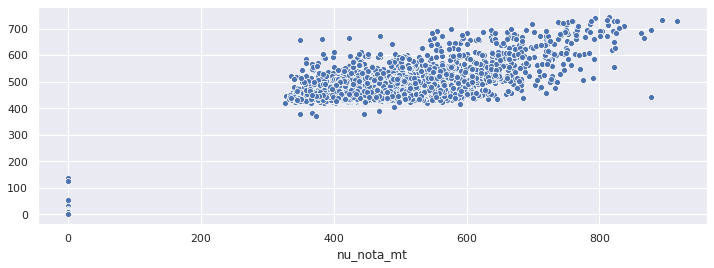

In [23]:
plt.figure(figsize=(12, 4))
ax = sns.scatterplot(x=test_label, y=y_pred)
plt.show()

# Submissão

In [24]:
y = dados.nu_nota_mt
X = dados[variaveis]

pipeline_modelo.fit(X, y)

X = dados_teste[variaveis]
y_pred = pipeline_modelo.predict(X)

In [26]:
submissao = pd.DataFrame({
    'NU_INSCRICAO': dados_teste.nu_inscricao.values,
    'NU_NOTA_MT': y_pred
})
submissao.to_csv('answer.csv', index = False)